In [4]:
from kan import KAN, create_dataset
import torch

In [17]:
model = KAN(width=[1,4,4,1], grid=6, k=3, seed=33)

In [18]:
def target_fn(x):
    x_abs = (x * 1.5).abs()
    return x + x_abs - x_abs.trunc()
dataset = create_dataset(target_fn, n_var=1)

In [19]:
model.train(dataset, opt="Adam", steps=200);

train loss: 1.00e-01 | test loss: 9.00e-02 | reg: 6.43e+01 : 100%|█| 200/200 [00:02<00:00, 79.50it/s


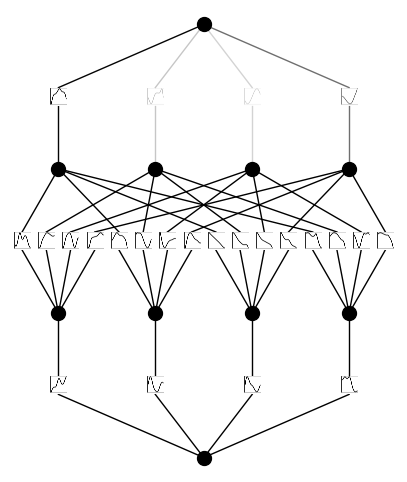

In [20]:
model.plot(beta=100)

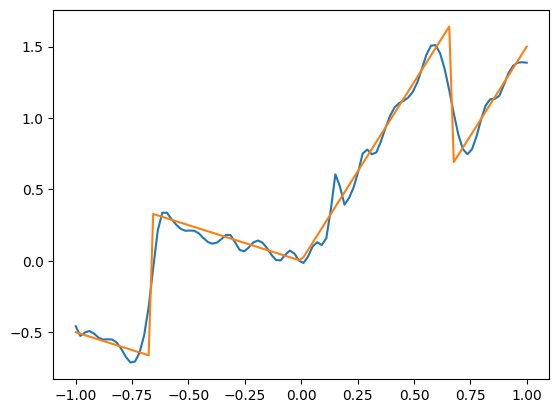

In [25]:
# plot model response across the input space
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 100)
y_pred = model(torch.tensor(x).view(-1,1)).detach().numpy()
y_actual = target_fn(torch.tensor(x).view(-1,1)).numpy()
plt.plot(x, y_pred, label="model")
plt.plot(x, y_actual, label="actual")

In [54]:
(float(model.biases[0].cpu().weight[0][0]), float(model.biases[1].cpu().weight[0][0]))

(-5.002864360809326, 0.9966086149215698)